In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
# create a banner image that is 50 images wide and 5 images tall (50 x 5 = 250) by cropping each image to 50 x 50 pixels and stacking them horizontally (np.hstack) and then stacking the rows vertically (np.vstack) to create a 250 x 50 image that fits in the banner image.
# images come from ../images/* and should sample one image from each year from 1970 to 2019

list_of_image_filepaths = [file for file in glob.glob("../images/*")]
# only include paths that use 'images' once
list_of_image_filepaths = [file for file in list_of_image_filepaths if file.count("/") == 2 and file.count('images') == 1 and file.count('.') == 2]
print(f'Found {len(list_of_image_filepaths)} images')

Found 212 images


In [26]:
# now get the first file from each of those filepaths (they are folders)
list_of_images = [file + '/' + os.listdir(file)[0] for file in list_of_image_filepaths]
print(len(list_of_images))

212


In [31]:
def banner_maker(list_of_image_filepaths):
    banner = []
    for i in range(0, len(list_of_image_filepaths), 50):
        row = []
        for j in range(50):
            try:
                # read the image
                image = cv.imread(list_of_image_filepaths[i + j])
                # resize the image
                image = cv.resize(image, (50, 50))
                # add the image to the row
                row.append(image)
            
            except:
                # make a blank image
                image = np.zeros((50, 50, 3), np.uint8)
                row.append(image)
            
        row = np.hstack(row)
        banner.append(row)
    banner = np.vstack(banner)
    return banner

# make a banner image
banner = banner_maker(list_of_image_filepaths)



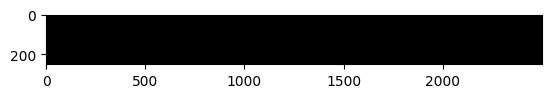

In [32]:
# show the banner image
plt.imshow(banner)